# Line segments, hypercubes, and permutahedra

In the first tutorial, we worked with a cube. Cubes can be characterized
and constructed in many different ways. In this tutorial, we will build them (and more complicated
polytopes) from simpler polytopes, namely *line segments*,
only using basic polyhedral operations such as Cartesian products, Minkowski sums, and translations.

## Hypercubes

Hypercubes are Cartesian products of line segments. For example, the 0/1 hypercube in $\mathbb{R}^n$
is the $n$-fold product of

In [1]:
using Spindles # hide
l = Polytope([[0], [1]]);
nothing # hide

which is the line segment $[0,1]$ in dimension one.
*Spindles.jl* implements the Cartesian product of two polytopes simply by overloading
the multiplication operator `*`. Thus, the following code creates the 0/1 cube in 3D:

In [2]:
collect(vertices(l * l * l))

8-element Vector{Vector{Rational{BigInt}}}:
 [1, 1, 1]
 [1, 1, 0]
 [1, 0, 1]
 [1, 0, 0]
 [0, 1, 1]
 [0, 1, 0]
 [0, 0, 1]
 [0, 0, 0]

Using the Julia functions
[`repeat`](https://docs.julialang.org/en/v1/base/arrays/#Base.repeat) and
[`reduce`](https://docs.julialang.org/en/v1/base/collections/#Base.reduce-Tuple{Any,%20Any}),
we may even create 0/1 hypercubes in any given dimension `n` very succinctly:

In [3]:
n = 4
p = reduce(*, repeat([l], n))
collect(vertices(p))

16-element Vector{Vector{Rational{BigInt}}}:
 [1, 1, 1, 1]
 [1, 1, 1, 0]
 [1, 1, 0, 1]
 [1, 1, 0, 0]
 [1, 0, 1, 1]
 [1, 0, 1, 0]
 [1, 0, 0, 1]
 [1, 0, 0, 0]
 [0, 1, 1, 1]
 [0, 1, 1, 0]
 [0, 1, 0, 1]
 [0, 1, 0, 0]
 [0, 0, 1, 1]
 [0, 0, 1, 0]
 [0, 0, 0, 1]
 [0, 0, 0, 0]

To make this even more convenient, *Spindles.jl* comes with in-built generators for common polytopes
including hypercubes (see Generators for standard polytopes).
The generator function `cube` creates a hypercube of given dimension,
except that it is the *standard* hypercube with vertex coordinates
in $\{-1,1\}$ and not the 0/1 hypercube that we created above.
However, we may easily transform one into the other.

In [4]:
cube(n) == 2p - ones(n)

true

In [5]:
p == 1//2 * (cube(n) + ones(Int, n))

true

Note here that taking the sum of a polytope and a vector (like the all-ones vector created with
[`ones`](https://docs.julialang.org/en/v1/base/arrays/#Base.ones))
is interpreted as a translation of the polytope. Likewise, multiplying a polytope by a scalar rescales the entire polytope
(see also Operators in the API documentation).

> **Operations and types**
>
> Both translations and rescalations of polytopes produce a new `Polytope`.
> Its element type, however, may be different from the initial one since it depends on
> the element type of the translation vector (or the type of the scalar multiplier, respectively).
>
> For instance, `2p - ones(n)` in the first transformation above is of type `Polytope{BigFloat}`
> while `p` was created as a `Polytope{Rational{BigInt}}`.
> This is because `ones` by default creates a vector of `Float`s.
> Compare this with the second transformation above, which preserves types.

Consider again the line segment `l` from which we built our hypercube.
It is also a simplex (in dimension one), which can be created using the generator function
`simplex`:

In [6]:
simplex(1) == l

true

The code snippet above now becomes

In [7]:
p == reduce(*, repeat([simplex(1)], n))

true

Next, let's look at another class of polytopes derived from line segments (or hypercubes).

## Permutahedra

For any natural number $n$, the *$n$-th permutahedron* is the polytope in $\mathbb{R}^n$
whose vertices are precisely the $n!$ permutations of the natural numbers from $1$ to $n$,
written as vectors of length $n$.

To create a permutahedron, we could of course construct it explicitly from the list of its vertices.
For the purpose of demonstration, we will follow a different approach and leverage some of the (many!)
characterizations of permutahedra.

### Minkowski sums

Our first characterization is in terms of line segments again.
In fact, take a natural number $n$, say

In [8]:
n = 3;
nothing # hide

Then the Minkowski sum of the $n(n-1)/2$ line segments $[0, \mathbf{e}_i - \mathbf{e}_j]$
for all pairs $i,j$ with $1 \le i < j \le n$ is a translate of the $n$-th permutahedron
(where we use $\mathbf{e}_i$ to denote the $i$-th standard basis vector). To verify this computationally,
let's create the directions of all those line segments first.

In [9]:
directions = [Int.(1:n .== i) - Int.(1:n .== j) for i=1:n for j=i+1:n]

3-element Vector{Vector{Int64}}:
 [1, -1, 0]
 [1, 0, -1]
 [0, 1, -1]

To get the permutahedron from this collection of vectors,
we create each line segment as its own `Polytope`, take the Minkowski sum of all segments,
and finally translate the resulting polytope by the vector $(1,2,\dots,n)$.
We may do all of this in a single line using the Julia function
`sum`:

In [10]:
p = collect(1:n) + sum(d -> Polytope([zeros(Int, n), d]), directions)
collect(vertices(p))

6-element Vector{Vector{Rational{BigInt}}}:
 [1, 2, 3]
 [1, 3, 2]
 [2, 3, 1]
 [2, 1, 3]
 [3, 1, 2]
 [3, 2, 1]

As desired, the vertices of the resulting polytope `p` are precisely the permutations of 1 to 3.
Observe that the coordinates of each vertex of `p` sum up to 6, which implies that `p` cannot
be full-dimensional:

In [11]:
dim(p)

2

Since the permutahedron for $n=3$ is 2-dimensional, we can even visualize it using
[Plots.jl](https://github.com/JuliaPlots/Plots.jl).
We label each vertex by the corresponding permutation.

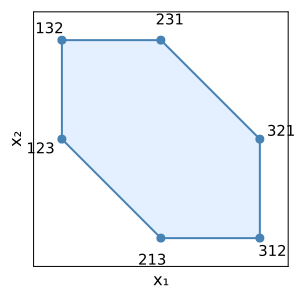

In [12]:
using Plots
plot(p; ineqlabels=nothing, vertexlabels=[join(Int.(v)) for v in vertices(p)])

Note that the edge directions are precisely the vectors in `directions`:

In [13]:
using Graphs: edges, src, dst
for e in edges(graph(p))
    println(reduce(-, collect(vertices(p))[[dst(e), src(e)]]))
end

Rational{BigInt}[0, 1, -1]
Rational{BigInt}[1, -1, 0]
Rational{BigInt}[1, 0, -1]
Rational{BigInt}[1, -1, 0]
Rational{BigInt}[1, 0, -1]
Rational{BigInt}[0, 1, -1]


### Projections of hypercubes

Our second characterization of permutahedra uses hypercubes and is, in fact,
closely related to the first one. Namely, suppose that we collect the directions of the
line segments from which `p` was created in a matrix:

In [14]:
T = hcat(directions...)

3×3 Matrix{Int64}:
  1   1   0
 -1   0   1
  0  -1  -1

This matrix defines a linear map, and after a translation, the image of the 0/1 hypercube under this map
turns out to be our permutahedron `p` again.

In [15]:
m = length(directions)
c = 1//2 * (cube(m) + ones(Int, m))  # 0/1 hypercube in dimension m
p == collect(1:n) + map(x -> T * x, c)

true

Finally, as for hypercubes, *Spindles.jl* also provides a convenient generator for permutahedra,
called `permutahedron`.

In [16]:
p == permutahedron(n)

true

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*